In [78]:
#Importing Required packages
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
#MNIST contains images of hand-written digits, each 28 x 28 pixels, in greyscale with pixel-values from 0 to 255.
file = 'train-images-idx3-ubyte'   #importing training images
arr = idx2numpy.convert_from_file(file)   #converting to numpy array
file1 = 'train-labels-idx1-ubyte'       #importing training labels
arr1 = idx2numpy.convert_from_file(file1)  #converting to numpy array

In [80]:
x_train = arr
x_train = x_train.flatten().reshape(-1,28*28) #Flatten to give input in input node
x_train = x_train / 255.0    #We’ll normalize the data to keep our gradients manageable
gt_indices = arr1
train_length = len(x_train)

In [81]:
batch_size = 64 #batch size was tuned by using 32/64
input_dim = 784 #number of nodes in input nodes is 28*28
hidden_1_dim = 512  #Number of nodes in first hidden layer was tuned by taking 256/392/512
output_dim = 10   # For 10 digits, output layers has 10 nodes 
learning_rate = 1e-2  #Learning rate is tuned by taking 1e-1/1e-2/1e-3/1e-4

In [82]:
y_train = np.zeros((train_length, output_dim))
for i in range(train_length):
    y_train[i,gt_indices[i]] = 1

num_minibatches = np.floor(train_length/batch_size).astype(int) 

In [83]:
W1 = 0.2*np.random.randn(input_dim, hidden_1_dim) #Random Weight Initialisation for nodes between input and first hidden layer
W2 = 0.2*np.random.randn(hidden_1_dim,output_dim)   #Random weight initialisation for nodes between first hidden layer and output layer

In [84]:
def relu(a):                    #Relu Activation Function to be used in hidden layer
    return np.maximum(a,0)

def grad_relu(x):               #Gradient of Relu Activation Function
    return 1. * (x > 0)

In [85]:
def softmax(z):                    #Softmax activation function, to be used at outer layer
  
    return np.exp(z) / np.sum(np.exp(z),axis=1,keepdims=True)
    
    pass


 Epoch: 0, iteration: 0, Loss: 9.8334 
 Epoch: 1, iteration: 937, Loss: 0.1079 
 Epoch: 2, iteration: 1874, Loss: 0.0983 
 Epoch: 3, iteration: 2811, Loss: 0.0715 
 Epoch: 4, iteration: 3748, Loss: 0.0235 
 Epoch: 5, iteration: 4685, Loss: 0.0075 
 Epoch: 6, iteration: 5622, Loss: 0.0030 
 Epoch: 7, iteration: 6559, Loss: 0.0033 
 Epoch: 8, iteration: 7496, Loss: 0.0030 
 Epoch: 9, iteration: 8433, Loss: 0.0029 
 Epoch: 10, iteration: 9370, Loss: 0.0046 
 Epoch: 11, iteration: 10307, Loss: 0.0045 
 Epoch: 12, iteration: 11244, Loss: 0.0044 
 Epoch: 13, iteration: 12181, Loss: 0.0042 
 Epoch: 14, iteration: 13118, Loss: 0.0041 
 Epoch: 15, iteration: 14055, Loss: 0.0039 
 Epoch: 16, iteration: 14992, Loss: 0.0038 
 Epoch: 17, iteration: 15929, Loss: 0.0037 
 Epoch: 18, iteration: 16866, Loss: 0.0036 
 Epoch: 19, iteration: 17803, Loss: 0.0035 
 Epoch: 20, iteration: 18740, Loss: 0.0035 
 Epoch: 21, iteration: 19677, Loss: 0.0035 


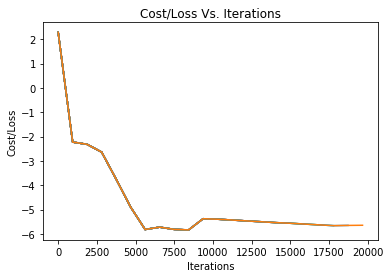

In [86]:

no_of_iterations = 20000          # Number of iterations was tuned by using 10000/15000/20000/25000/30000
loss_list=[]
i = []
i_epoch = 0

for i_iter in range(no_of_iterations):
    #Forward Propagation
    batch_elem_idx = i_iter%num_minibatches
    x_batchinput = x_train[batch_elem_idx*batch_size:(batch_elem_idx+1)*batch_size]
    a1 =x_batchinput@W1
    h1 =relu(a1)
    a2 = h1@W2
    softmax_score = softmax(a2) 
    neg_log_softmax_score = -np.log(softmax_score+0.00000001) 
    
 
    if i_iter%num_minibatches == 0:
        loss = np.mean(np.diag(np.take(neg_log_softmax_score, gt_indices[batch_elem_idx*batch_size:(batch_elem_idx+1)*batch_size],\
                                       axis=1)))
        print(" Epoch: {:d}, iteration: {:d}, Loss: {:6.4f} ".format(i_epoch, i_iter, loss))
        
        loss_list.append(loss)
        i.append(i_iter)
        i_epoch += 1
        
        plt.plot(i,np.log(loss_list))
        
        if i_epoch%10 == 0:
            learning_rate /= 10.0
            
    
    
    #Backpropagation
    gradsoft = softmax_score-y_train[batch_elem_idx*batch_size:(batch_elem_idx+1)*batch_size]
    
    grad_W2 = np.transpose(h1)@gradsoft
    grad_h1 = gradsoft@np.transpose(W2)
    grad_a1 = grad_h1*grad_relu(a1)
    grad_W1 = x_batchinput.T@grad_a1
    W2 -= learning_rate * grad_W2
    W1 -= learning_rate * grad_W1
#Plot of Loss vs Number of iterations
plt.title("Cost/Loss Vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost/Loss")
plt.show()

In [87]:
file2 = 't10k-images-idx3-ubyte'           #Importing Test images
arr2 = idx2numpy.convert_from_file(file2)  #Converting to numpy Array
file3 = 't10k-labels-idx1-ubyte'           #Importing test labesls
arr3 = idx2numpy.convert_from_file(file3)  #Converting to numpy array

In [88]:
x_test = arr2
x_test = x_test.flatten().reshape(-1,28*28) #Flatten to feed to input layer
x_test = x_test / 255.0                     #We’ll normalize the data
y_test = arr3

In [89]:
#Validation on test data
batch_size_test = 100
num_minibatches = len(y_test)/batch_size_test
test_correct = 0


for i_iter in range(int(num_minibatches)):
    
    batch_elem_idx = i_iter%num_minibatches
    x_batchinput = x_test[i_iter*batch_size_test:(i_iter+1)*batch_size_test]
    a1 =x_batchinput@W1
    h1 =relu(a1)
    a2 = h1@W2
    softmax_score = softmax(a2) 
    
    y_batchinput = y_test[i_iter*batch_size_test:(i_iter+1)*batch_size_test]
    
    y_pred = np.argmax(softmax_score, axis=1)
    num_correct_i_iter = np.sum(y_pred == y_batchinput)
    test_correct += num_correct_i_iter
print ("Accuracy on test data is {:4.2f} %".format(test_correct/len(y_test)*100))


Accuracy on test data is 98.08 %


In [66]:
#END Note
#Model was optimised by varying hyperparameters i.e. batch size, number of nodes in hidden layer, learning rate and number of iterations.
#The best accuracy was found at batch size=64, nodes in hidden layer=512, learning rate=1e-2 and number of iterations=20000